In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.makedirs('modifiedDatasets', exist_ok=True)


In [ ]:
# Load UNSW training set (provided path)
df = pd.read_csv('UNSW_Train_Test Datasets/UNSW_NB15_training-set.csv')
df.head()

In [3]:
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


# Feature lists

In [4]:
# features = df.columns \ {id, proto, service, state, attack_cat, label}
# contains all features we would like to use in either our DT or KNN models
features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload',
    'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb',
    'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len',
    'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']

# non_numeric contains all features that are not numbers
# they are not appropriate features for KNN as a distance metric is not well-defined
non_numeric = ['is_sm_ips_ports', 'is_ftp_login']

# numeric features: features that are numbers
# numeric_features = features \ non_numeric
numeric_features = list(set(features) - set(non_numeric))

# non log: all numeric features which do not need a log transform
# they end up being all the features with between [7, 32] unique numeric values
non_log = ['sttl', 'dttl', 'swin', 'dwin', 'trans_depth', 'ct_state_ttl', 'ct_flw_http_mthd']

# Log-transform and ordinal encoding

In [5]:
# taking log transform of all numeric features which were identified above as requiring the transformation
df_logs = np.log10(df[list(set(numeric_features) - set(non_log))] + 1)

# combine logged and non-logged numeric features into one df to clamp outliers
df_numeric = pd.concat([df_logs, df[non_log]], axis=1)

# all features combined together
df_transformed = pd.concat([df_numeric, df[non_numeric]], axis=1)[features]

In [6]:
df_transformed

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000005,0.477121,0.000000,2.696356,0.000000,4.958612,254,0,8.256149,0.000000,...,0.301030,0.301030,0.30103,0.477121,0,0.0,0,0.301030,0.477121,0
1,0.000003,0.477121,0.000000,3.246252,0.000000,5.096913,254,0,8.944976,0.000000,...,0.301030,0.301030,0.30103,0.477121,0,0.0,0,0.301030,0.477121,0
2,0.000002,0.477121,0.000000,3.028978,0.000000,5.301032,254,0,8.931661,0.000000,...,0.301030,0.301030,0.30103,0.602060,0,0.0,0,0.301030,0.602060,0
3,0.000003,0.477121,0.000000,2.954725,0.000000,5.221851,254,0,8.778151,0.000000,...,0.477121,0.477121,0.30103,0.602060,0,0.0,0,0.477121,0.602060,0
4,0.000004,0.477121,0.000000,3.327767,0.000000,5.000004,254,0,8.929623,0.000000,...,0.477121,0.477121,0.30103,0.602060,0,0.0,0,0.477121,0.602060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000002,0.477121,0.000000,2.021189,0.000000,5.301032,254,0,7.920123,0.000000,...,0.477121,0.301030,0.30103,0.477121,0,0.0,0,0.477121,0.301030,0
82328,0.323479,1.322219,0.954243,4.256790,2.550228,1.405006,254,252,5.093791,3.350851,...,0.477121,0.301030,0.30103,0.301030,0,0.0,0,0.602060,0.477121,0
82329,0.000000,0.301030,0.000000,1.672098,0.000000,0.000000,0,0,0.000000,0.000000,...,0.301030,0.301030,0.30103,0.301030,0,0.0,0,0.301030,0.301030,1
82330,0.000000,0.301030,0.000000,1.672098,0.000000,0.000000,0,0,0.000000,0.000000,...,0.301030,0.301030,0.30103,0.301030,0,0.0,0,0.301030,0.301030,1


# Mutual info from raw continuous data

In [7]:
from sklearn.feature_selection import mutual_info_classif

mi_arr = mutual_info_classif(X=df_transformed, y=df.label)

In [8]:
df_mi = pd.DataFrame(np.array([df_transformed.columns, mi_arr]).T).sort_values(by=1, ascending=False)
df_mi.columns = ['feature', 'mi']
df_mi['mi'] = df_mi.mi.astype('float')

In [9]:
df_mi

,feature,mi
3,sbytes,0.461039
23,smean,0.359222
8,sload,0.345159
4,dbytes,0.293965
28,ct_state_ttl,0.279980
5,rate,0.263356
0,dur,0.254336
24,dmean,0.251265
7,dttl,0.240889
13,dinpkt,0.237150


In [10]:
mi_cutoff = 0.2
(pd
    .concat([df_transformed[df_mi.feature[df_mi.mi > mi_cutoff]], df.label], axis=1)
    .to_csv('modifiedDatasets/preprocessed.csv', index=False))

# Visualisations

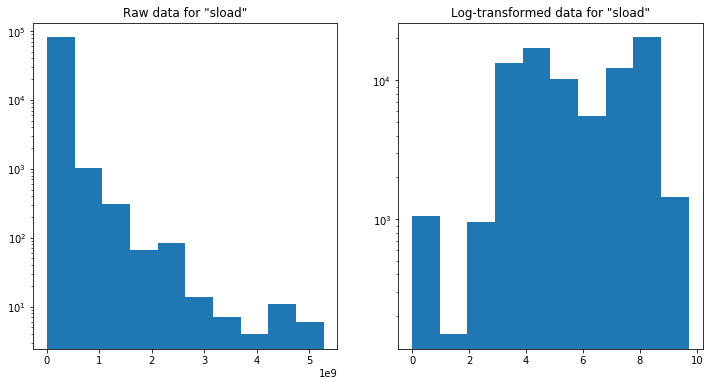

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(df.sload, log=True)
axs[0].set_title('Raw data for "sload"')
axs[1].hist(df_logs.sload, log=True)
axs[1].set_title('Log-transformed data for "sload"')
fig.savefig('figures/log_transform.png')

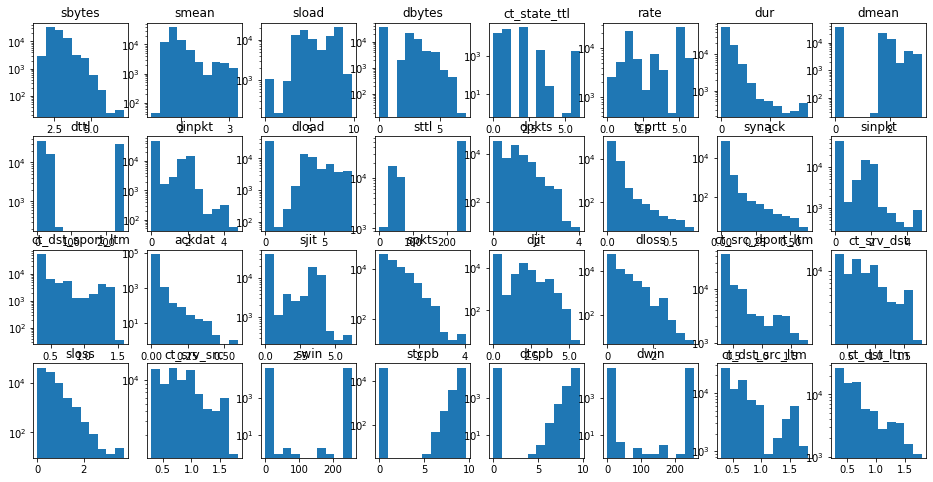

In [12]:
fig, axs = plt.subplots(4, 8, figsize=(16, 8), squeeze=True)
for i, f in enumerate(df_mi.feature[:32]):
    axs[i//8][i%8].hist(df_transformed[f], log=True)
    axs[i//8][i%8].set_title(f)
fig.savefig('figures/dists.png')

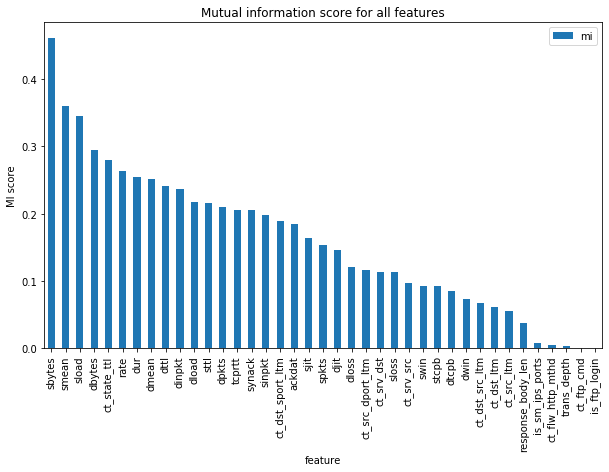

In [13]:
fig = (df_mi
    .set_index('feature')
    .plot(
        kind='bar', figsize=(10, 6), ylabel='MI score',
        title='Mutual information score for all features'
    )
    .get_figure()
    .savefig('figures/mi.png'))